In [1]:
from read_data import data_to_dataframe
from cleaning import clean_all
import pandas as pd

from plot import taglist_no_regions , taglist_counted , taglist

In [2]:
df = data_to_dataframe()

In [3]:
df = clean_all(df)

In [4]:
taglist = taglist(df)

In [5]:
taglist_counted = taglist_counted(df)

<Axes: >

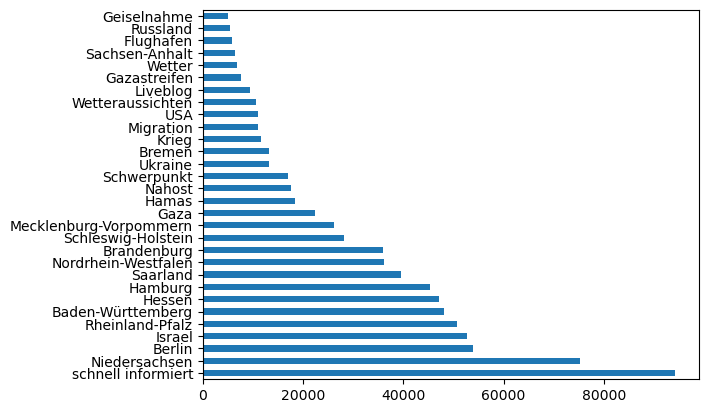

In [13]:
taglist_counted.head(30).plot(kind='barh')

In [7]:
taglist_no_regions = taglist_no_regions(df)

<Axes: >

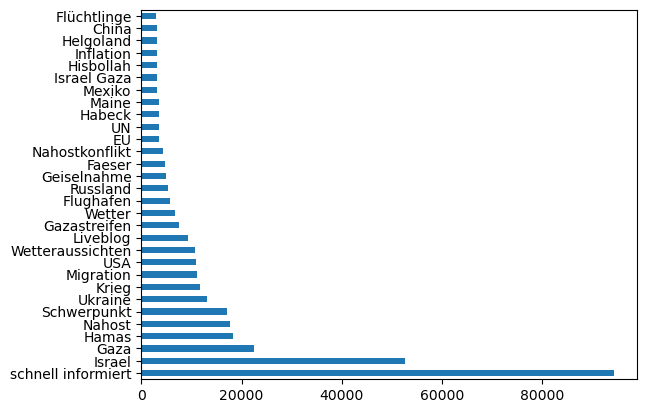

In [12]:
taglist_no_regions.head(30).plot(kind='barh')